<a href="https://colab.research.google.com/github/gustavoramos82/analise-e-modelagem-das-a-es-magalu/blob/main/An%C3%A1lise_A%C3%A7%C3%B5es_Magalu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise das Ações da Magalu (MGLU3)

Neste projeto será feito uma analise dos preços das ações da magalu obtido a partir da blibioteca yahoo finance de 2018 até 20 de janeiro de 2023, no primeiro momento será feito uma análise exploratória, após isso, será feito a modelagem com aplicação de séries temporais.

In [ ]:
# Baixando a blibioteca do yahoo finance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
!pip install pymannkendall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yahooFinance
import pymannkendall as mk
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
magalu = yahooFinance.Ticker("MGLU3.SA")

In [ ]:
magalu = magalu.history(period="5y")
magalu

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-22 00:00:00-02:00,2.344183,2.345691,2.285993,2.321571,21116800,0.0,0.0
2018-01-23 00:00:00-02:00,2.313128,2.320967,2.249511,2.254034,30470400,0.0,0.0
2018-01-24 00:00:00-02:00,2.261270,2.442171,2.260667,2.441869,71094400,0.0,0.0
2018-01-25 00:00:00-02:00,2.441869,2.441869,2.441869,2.441869,0,0.0,0.0
2018-01-26 00:00:00-02:00,2.472322,2.547697,2.442171,2.496442,65676800,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-16 00:00:00-03:00,3.380000,3.960000,3.370000,3.850000,223987500,0.0,0.0
2023-01-17 00:00:00-03:00,3.900000,4.020000,3.660000,3.790000,253024500,0.0,0.0
2023-01-18 00:00:00-03:00,3.840000,3.880000,3.520000,3.560000,227221500,0.0,0.0


## Analisando Variação dos Preços

In [ ]:
px.line(magalu,x=magalu.index,y='Close',
        title='Valores da Ação de Fechamento da Magalu (MGLU3) de 2018 a 2023',
        labels={'Date':'Data','Close':'Preço de Fechamendo do Dia'})

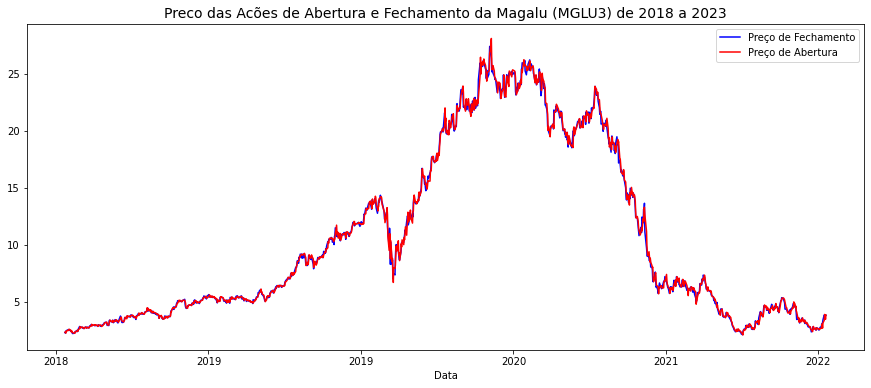

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Preco das Acões de Abertura e Fechamento da Magalu (MGLU3) de 2018 a 2023',
           fontsize=14)
sns.lineplot(x=magalu.index,y='Close',data=magalu,color='blue',label='Preço de Fechamento')
sns.lineplot(x=magalu.index,y='Open',data=magalu,color='red',label='Preço de Abertura')
plt.xlabel('Data')
plt.ylabel('')
plt.legend();

In [ ]:
magalu.reset_index(inplace=True)
magalu.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-22 00:00:00-02:00,2.344183,2.345691,2.285993,2.321571,21116800,0.0,0.0
1,2018-01-23 00:00:00-02:00,2.313128,2.320967,2.249511,2.254034,30470400,0.0,0.0
2,2018-01-24 00:00:00-02:00,2.261270,2.442171,2.260667,2.441869,71094400,0.0,0.0
3,2018-01-25 00:00:00-02:00,2.441869,2.441869,2.441869,2.441869,0,0.0,0.0
4,2018-01-26 00:00:00-02:00,2.472322,2.547697,2.442171,2.496442,65676800,0.0,0.0


In [ ]:
magalu['Ano'] = magalu['Date'].dt.year

In [ ]:
magalu.drop(['Dividends','Stock Splits'],axis=1,inplace=True)
magalu.head()

,Date,Open,High,Low,Close,Volume,Ano
0,2018-01-22 00:00:00-02:00,2.344183,2.345691,2.285993,2.321571,21116800,2018
1,2018-01-23 00:00:00-02:00,2.313128,2.320967,2.249511,2.254034,30470400,2018
2,2018-01-24 00:00:00-02:00,2.261270,2.442171,2.260667,2.441869,71094400,2018
3,2018-01-25 00:00:00-02:00,2.441869,2.441869,2.441869,2.441869,0,2018
4,2018-01-26 00:00:00-02:00,2.472322,2.547697,2.442171,2.496442,65676800,2018


Text(0.5, 0, 'Preço de Fechamento')

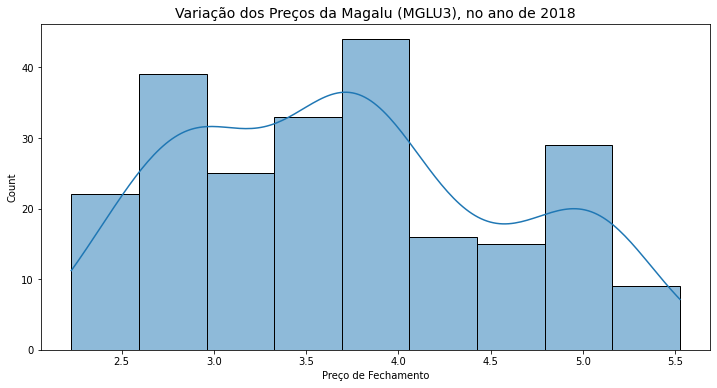

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Variação dos Preços da Magalu (MGLU3), no ano de 2018',
          fontsize=14)
sns.histplot(x='Close',data=magalu[magalu['Ano']==2018],kde=True)
plt.xlabel('Preço de Fechamento')

Text(0.5, 0, 'Preço de Fechamento')

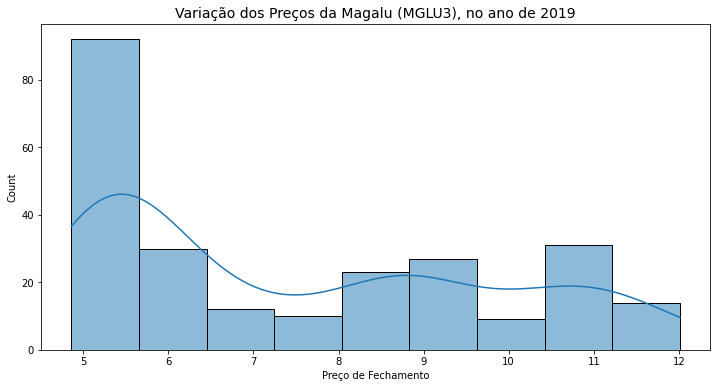

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Variação dos Preços da Magalu (MGLU3), no ano de 2019',
          fontsize=14)
sns.histplot(x='Close',data=magalu[magalu['Ano']==2019],kde=True)
plt.xlabel('Preço de Fechamento')

Text(0.5, 0, 'Preço de Fechamento')

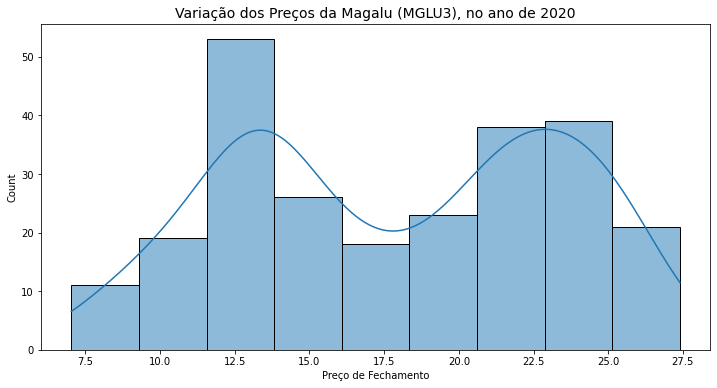

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Variação dos Preços da Magalu (MGLU3), no ano de 2020',
          fontsize=14)
sns.histplot(x='Close',data=magalu[magalu['Ano']==2020],kde=True)
plt.xlabel('Preço de Fechamento')

Text(0.5, 0, 'Preço de Fechamento')

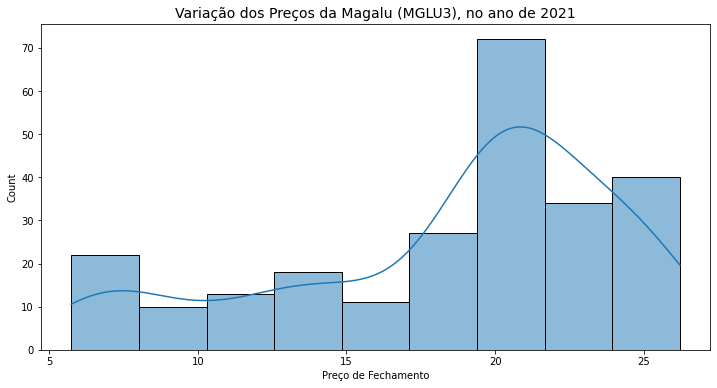

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Variação dos Preços da Magalu (MGLU3), no ano de 2021',
          fontsize=14)
sns.histplot(x='Close',data=magalu[magalu['Ano']==2021],kde=True)
plt.xlabel('Preço de Fechamento')

Text(0.5, 0, 'Preço de Fechamento')

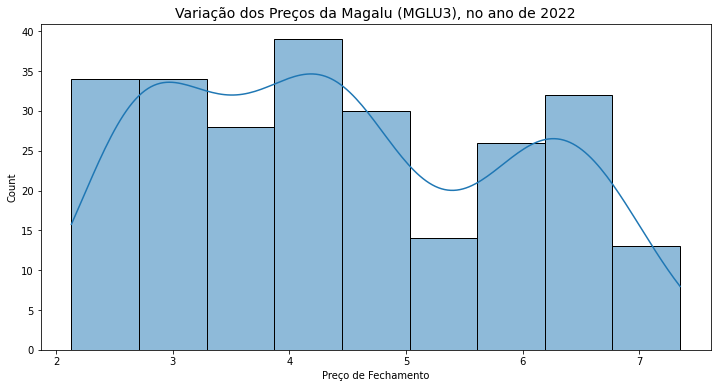

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Variação dos Preços da Magalu (MGLU3), no ano de 2022',
          fontsize=14)
sns.histplot(x='Close',data=magalu[magalu['Ano']==2022],kde=True)
plt.xlabel('Preço de Fechamento')

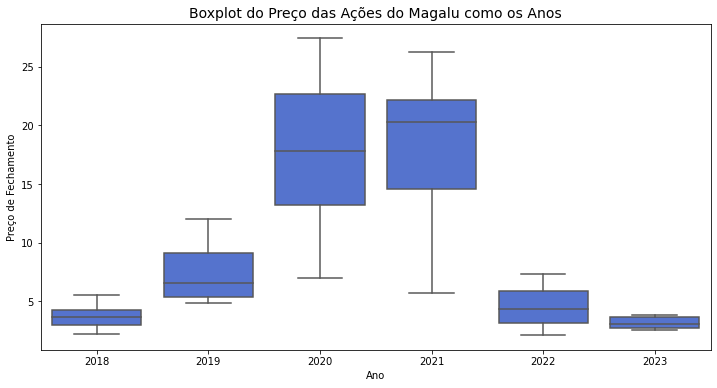

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Boxplot do Preço das Ações do Magalu como os Anos',fontsize=14)
sns.boxplot(x='Ano',y='Close',data=magalu,color='royalblue')
plt.ylabel('Preço de Fechamento');

## Analisando Tendências

In [ ]:
tend_magalu_2018 = mk.original_test(magalu[magalu['Ano']==2018]['Close'])

nomes = ['Tendência','Presença de tendência','p-valor','Estatística do teste',
         'Tau Kendall','Pontuação Kendall','Variância S','Declive','Intercepto']


for i,j in zip(nomes,tend_magalu_2018):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 18.59981869482354
Tau Kendall : 0.8202716823406478
Pontuação Kendall : 21980.0
Variância S : 1396363.3333333333
Declive : 0.012382171175887614
Intercepto : 2.251229845144148


In [ ]:
tend_magalu_2019 = mk.original_test(magalu[magalu['Ano']==2019]['Close'])


for i,j in zip(nomes,tend_magalu_2019):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 18.633119257711172
Tau Kendall : 0.7944038135039833
Pontuação Kendall : 24331.0
Variância S : 1704955.6666666667
Declive : 0.030956973800789572
Intercepto : 2.7663492103797096


In [ ]:
tend_magalu_2020 = mk.original_test(magalu[magalu['Ano']==2020]['Close'])


for i,j in zip(nomes,tend_magalu_2020):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 17.424652973604136
Tau Kendall : 0.7428823298942144
Pontuação Kendall : 22753.0
Variância S : 1704947.0
Declive : 0.069223413803069
Intercepto : 9.270404550106136


In [ ]:
tend_magalu_2021 = mk.original_test(magalu[magalu['Ano']==2021]['Close'])


for i,j in zip(nomes,tend_magalu_2021):
  print(i,":",j)

Tendência : decreasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : -17.16978006920547
Tau Kendall : -0.7335176590632303
Pontuação Kendall : -22285.0
Variância S : 1684445.0
Declive : -0.06977020353960568
Intercepto : 28.837047001313884


In [ ]:
tend_magalu_2022 = mk.original_test(magalu[magalu['Ano']==2022]['Close'])


for i,j in zip(nomes,tend_magalu_2022):
  print(i,":",j)

Tendência : decreasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : -10.584151052426828
Tau Kendall : -0.4494136546184739
Pontuação Kendall : -13988.0
Variância S : 1746373.3333333333
Declive : -0.014319527078662398
Intercepto : 6.107781168977184


In [ ]:


adf_conf = adfuller(magalu['Close'])

print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(adf_conf[0]))
print('Valor-p: {:.4f}'.format(adf_conf[1]))
print('Valores Críticos:')
for key, value in adf_conf[4].items():
	print('\t{}: {:.4f}'.format(key, value))
     


Dickey-Fuller Aumentado
Teste Estatístico: -0.9850
Valor-p: 0.7587
Valores Críticos:
	1%: -3.4356
	5%: -2.8639
	10%: -2.5680


In [ ]:
mm = magalu['Close'].rolling(30).mean()

In [ ]:
magalu['Tend'] = mm
magalu.head()

,Date,Open,High,Low,Close,Volume,Ano,Tend
0,2018-01-22 00:00:00,2.344183,2.345691,2.285993,2.321571,21116800,2018,NaN
1,2018-01-23 00:00:00,2.313128,2.320967,2.249511,2.254034,30470400,2018,NaN
2,2018-01-24 00:00:00,2.261270,2.442171,2.260667,2.441869,71094400,2018,NaN
3,2018-01-25 00:00:00,2.441869,2.441869,2.441869,2.441869,0,2018,NaN
4,2018-01-26 00:00:00,2.472322,2.547697,2.442171,2.496442,65676800,2018,NaN


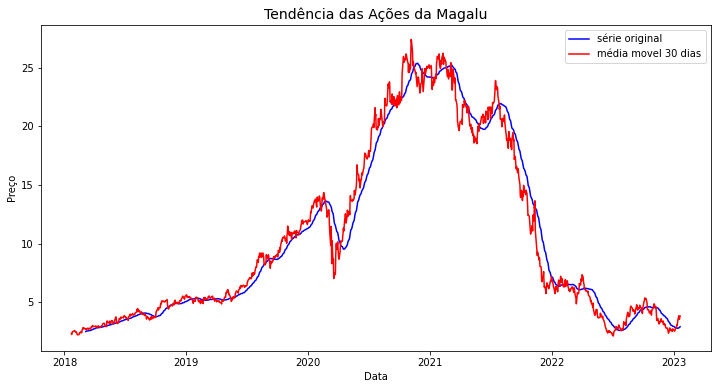

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Tendência das Ações da Magalu',fontsize=14)
plt.plot(magalu['Date'],magalu['Tend'],color='blue',label='série original')
plt.plot(magalu['Date'],magalu['Close'],color='red',label='média movel 30 dias')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend();